<a href="https://colab.research.google.com/github/aman-makode-11/MLPractice/blob/main/Pract7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Assuming the dataset is in a CSV file
dataset = pd.read_csv("diabetes.csv")

# Check the data
print(dataset.head())
print(dataset.info())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [4]:
dataset.fillna(dataset.median(), inplace=True)

In [5]:
X = dataset.drop("Outcome", axis=1)  # Features
y = dataset["Outcome"]              # Target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Implement Bagging using Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate
print("Random Forest - Accuracy:", accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest - Accuracy: 0.7207792207792207
[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [8]:
# Implement Boosting using Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Evaluate
print("Gradient Boosting - Accuracy:", accuracy_score(y_test, gb_predictions))
print(confusion_matrix(y_test, gb_predictions))
print(classification_report(y_test, gb_predictions))


Gradient Boosting - Accuracy: 0.7467532467532467
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [9]:
print("Model Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_predictions)}")


Model Comparison:
Random Forest Accuracy: 0.7207792207792207
Gradient Boosting Accuracy: 0.7467532467532467


In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Random Forest Metrics
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Performance:")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")

# Gradient Boosting Metrics
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

print("\nGradient Boosting Performance:")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1-Score: {gb_f1:.2f}")

# Comparison Table
print("\nModel Comparison:")
print(f"Random Forest -> Precision: {rf_precision:.2f}, Recall: {rf_recall:.2f}, F1-Score: {rf_f1:.2f}")
print(f"Gradient Boosting -> Precision: {gb_precision:.2f}, Recall: {gb_recall:.2f}, F1-Score: {gb_f1:.2f}")


Random Forest Performance:
Precision: 0.61
Recall: 0.62
F1-Score: 0.61

Gradient Boosting Performance:
Precision: 0.64
Recall: 0.67
F1-Score: 0.65

Model Comparison:
Random Forest -> Precision: 0.61, Recall: 0.62, F1-Score: 0.61
Gradient Boosting -> Precision: 0.64, Recall: 0.67, F1-Score: 0.65


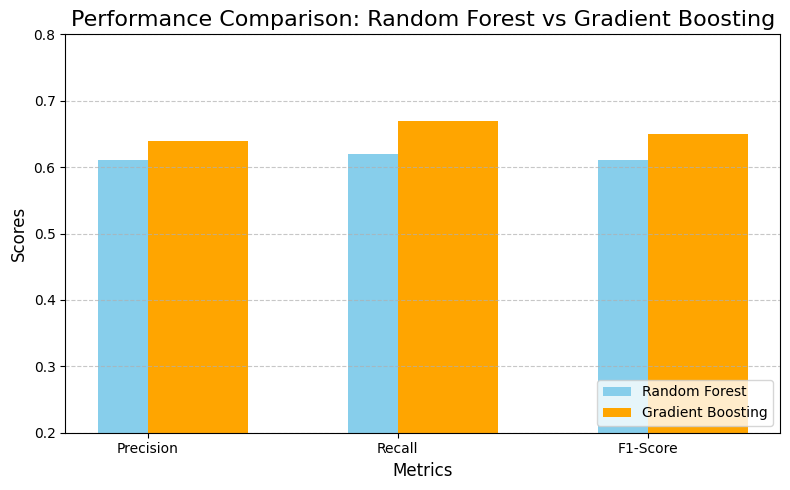

In [12]:
import matplotlib.pyplot as plt

# Metrics and corresponding scores for both models
metrics = ['Precision', 'Recall', 'F1-Score']
rf_scores = [0.61, 0.62, 0.61]  # Random Forest Scores
gb_scores = [0.64, 0.67, 0.65]  # Gradient Boosting Scores

# Create the bar graph
plt.figure(figsize=(8, 5))
plt.bar(metrics, rf_scores, width=0.4, label='Random Forest', align='center', color='skyblue')
plt.bar(metrics, gb_scores, width=0.4, label='Gradient Boosting', align='edge', color='orange')

# Adding titles and labels
plt.title('Performance Comparison: Random Forest vs Gradient Boosting', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.ylim(0.2, 0.8)  # Adjust y-axis range for clear differentiation
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.tight_layout()
plt.show()

In [13]:
#needed libraries import
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [14]:
#Implement Adaboost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)

# Metrics
ada_accuracy = accuracy_score(y_test, ada_predictions)
ada_precision = precision_score(y_test, ada_predictions)
ada_recall = recall_score(y_test, ada_predictions)
ada_f1 = f1_score(y_test, ada_predictions)

print("AdaBoost Metrics:")
print(f"Accuracy: {ada_accuracy:.2f}, Precision: {ada_precision:.2f}, Recall: {ada_recall:.2f}, F1-Score: {ada_f1:.2f}")


AdaBoost Metrics:
Accuracy: 0.74, Precision: 0.63, Recall: 0.67, F1-Score: 0.65


In [16]:
#Implement XDboost
xgb_model = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Metrics
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

print("XGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy:.2f}, Precision: {xgb_precision:.2f}, Recall: {xgb_recall:.2f}, F1-Score: {xgb_f1:.2f}")


XGBoost Metrics:
Accuracy: 0.71, Precision: 0.58, Recall: 0.65, F1-Score: 0.62


In [17]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

rf_results = [accuracy_score(y_test, rf_predictions), precision_score(y_test, rf_predictions), recall_score(y_test, rf_predictions), f1_score(y_test, rf_predictions)]
gb_results = [accuracy_score(y_test, gb_predictions), precision_score(y_test, gb_predictions), recall_score(y_test, gb_predictions), f1_score(y_test, gb_predictions)]
ada_results = [ada_accuracy, ada_precision, ada_recall, ada_f1]
xgb_results = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

results = pd.DataFrame({
    'Metrics': metrics,
    'Random Forest': rf_results,
    'Gradient Boosting': gb_results,
    'AdaBoost': ada_results,
    'XGBoost': xgb_results
})

print(results)


     Metrics  Random Forest  Gradient Boosting  AdaBoost   XGBoost
0   Accuracy       0.720779           0.746753  0.740260  0.707792
1  Precision       0.607143           0.637931  0.627119  0.580645
2     Recall       0.618182           0.672727  0.672727  0.654545
3   F1-Score       0.612613           0.654867  0.649123  0.615385


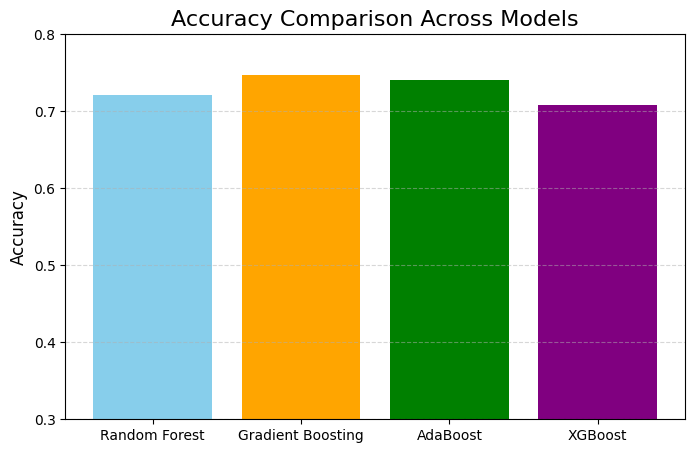

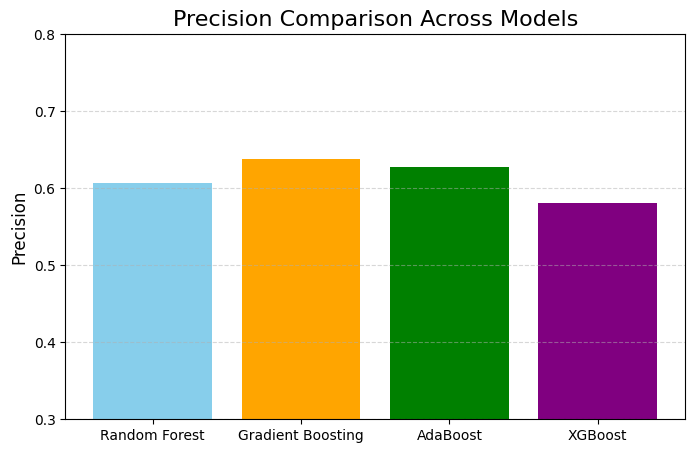

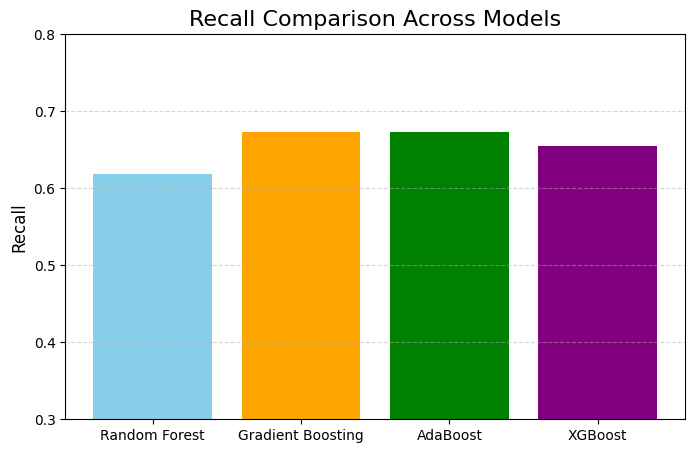

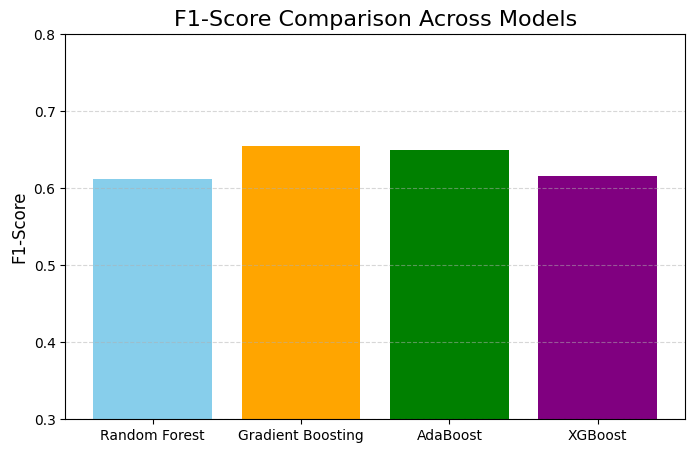

In [20]:
models = ['Random Forest', 'Gradient Boosting', 'AdaBoost', 'XGBoost']
scores = {
    'Accuracy': [rf_results[0], gb_results[0], ada_results[0], xgb_results[0]],
    'Precision': [rf_results[1], gb_results[1], ada_results[1], xgb_results[1]],
    'Recall': [rf_results[2], gb_results[2], ada_results[2], xgb_results[2]],
    'F1-Score': [rf_results[3], gb_results[3], ada_results[3], xgb_results[3]]
}

for metric, score in scores.items():
    plt.figure(figsize=(8, 5))
    plt.bar(models, score, color=['skyblue', 'orange', 'green', 'purple'])
    plt.title(f'{metric} Comparison Across Models', fontsize=16)
    plt.ylabel(f'{metric}', fontsize=12)
    plt.ylim(0.3, 0.8)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()
